In [2]:
import struct
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import struct
import pylab
import math
from IPython.display import Image
from scipy.stats import norm, kurtosis, stats

from helpFunctions import *
#----------
path = "C:\\Kandidat\\R&D\\Generalized-Deduplication-in-Python\\Bearing Data\\hoco-dek3kas1-m2_sensor2_2020-07-10_07-24-21.npz"
path_npz = "C:\\Kandidat\\R&D\\Generalized-Deduplication-in-Python\\CompressedData"

#----------
np.set_printoptions(suppress=True)          # Suppress scientific notation

## Load compressed and orginal data

In [3]:
lstData     =list()
lstBase     =list()
lstCounts   =list()
cAll =list()
header, data = loadData(path)
d_og = data.copy()
og_info = gather_Features(d_og)


for index in range(0,33):
    cAll.append(np.load(os.path.join(path_npz, 'Deviation_bits'+str(index)+'.npz'), allow_pickle=True))

for index in range(0,33):
    lstData.append(cAll[index]['Compressed_Data'])
    lstBase.append(cAll[index]['Bases'])
    lstCounts.append(cAll[index]['Counts'])

del cAll, index, data, header


## Number of Bases per deviation bit
For the given data file, all deviations are tried. The resulting amount of bases is displayed here.

As the deviation bits increase, the base becomes smaller.

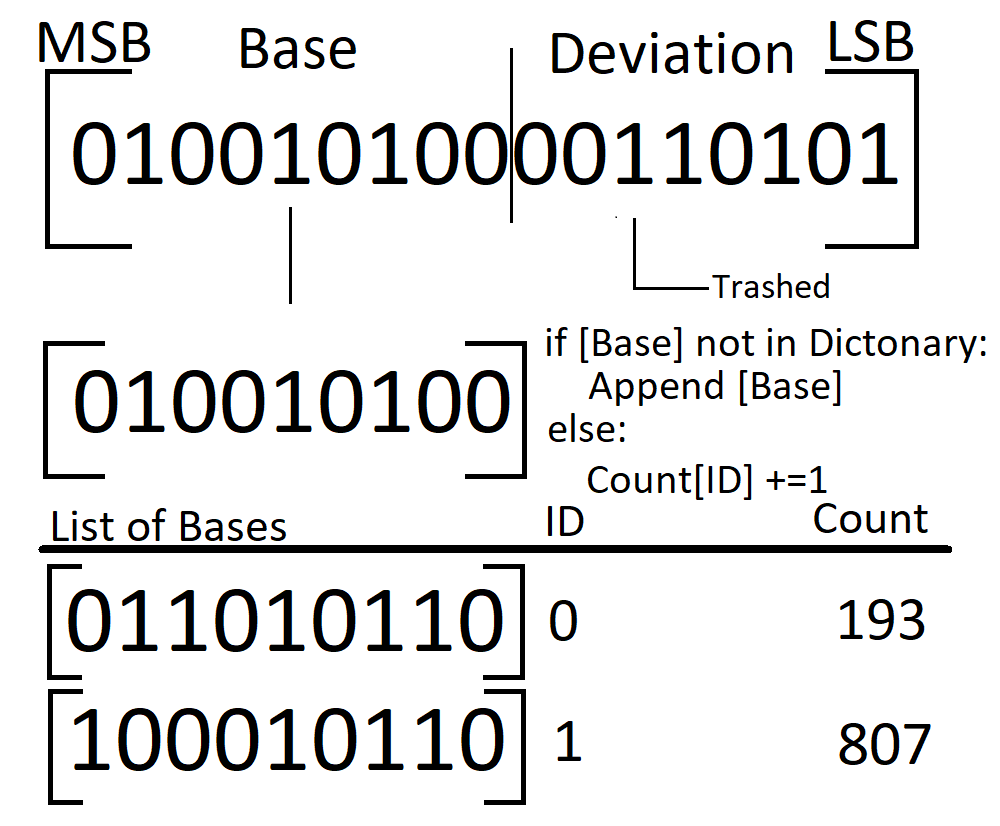

C:\Users\Jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\lines.py:190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return Path(verts[markevery], _slice_or_none(codes, markevery))


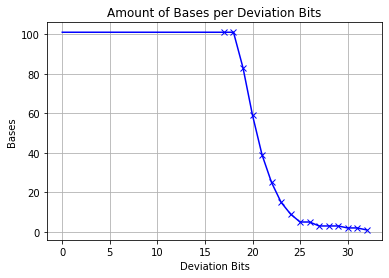

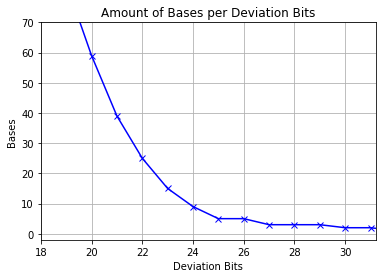

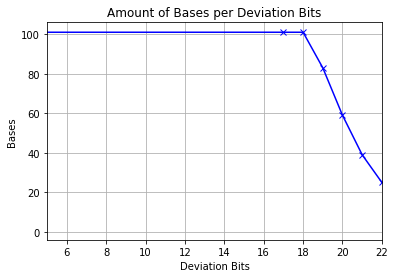

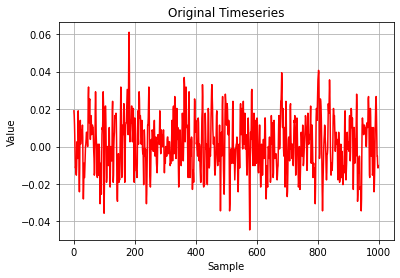

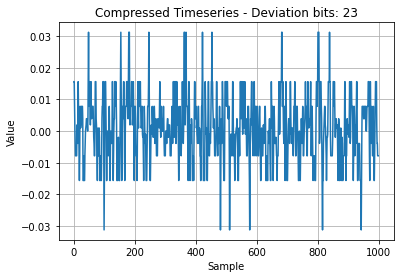

In [3]:
lenBase = list()
for i in range(0,len(lstBase)):
    lenBase.append(len(lstBase[i]))
for k in range(0,len(lenBase)):
    if not lenBase[k] == 101:
        k+1
        break
points = range(k-2,len(lenBase))


timeSeriesLength = 1000; devi = 23
plt.figure(1); plt.plot(lenBase,"-bx", markevery=[points]); plt.title("Amount of Bases per Deviation Bits"); plt.xlabel("Deviation Bits"); plt.ylabel("Bases"); plt.grid()
plt.figure(2);plt.plot(lenBase, '-bx', markevery=[points]); plt.title("Amount of Bases per Deviation Bits"); plt.xlabel("Deviation Bits"); plt.ylabel("Bases"); plt.ylim((-2,70)); plt.xlim((18,31.2)); plt.grid()
plt.figure(3); plt.plot(lenBase,'-bx', markevery=[points]); plt.title("Amount of Bases per Deviation Bits"); plt.xlabel("Deviation Bits"); plt.ylabel("Bases"); plt.xlim((5,22)); plt.grid()
#plt.plot(lenBase[15:30]); plt.title("Number of bases"); plt.xlabel("Deviation Bits"); plt.ylabel("Bases") 
plt.figure(4); plt.plot(d_og[0:timeSeriesLength], 'r'); plt.title('Original Timeseries'); plt.xlabel("Sample"); plt.ylabel("Value"); plt.grid()
plt.figure(5);plt.plot(lstData[devi][0:timeSeriesLength]); plt.title('Compressed Timeseries - Deviation bits: '+str(devi)); plt.xlabel("Sample"); plt.ylabel("Value"); plt.grid()

Image(filename='GDD CompressorMeta.png', width=300)
#    MSB       LSB
#   [010101|0011010]
#   [Base  |deviati]
#   [As deviation bits increase, the amount of bases decresse]

### Gather Analytics on data
gather_Features():
    returns list indexed:
- 0| # of Samples   
- 1| Minimum      
- 2| Maximum      
- 3| Mean     
- 4| Variance 
- 5| Skewness   
- 6| Kurtosis 
- 7| RootMeanSquare

In [4]:
featureLst = list()

for index in range(0,len(lstData)):
    featureLst.append(gather_Features(lstData[index]))
print(featureLst[4][3])

8.689343869686126e-06


## Finding mean from Bases + Counts

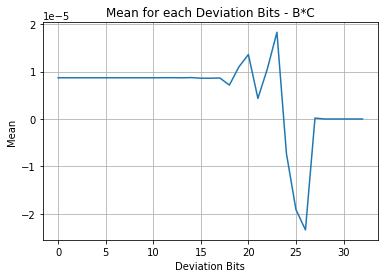

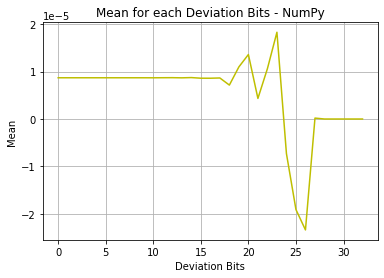

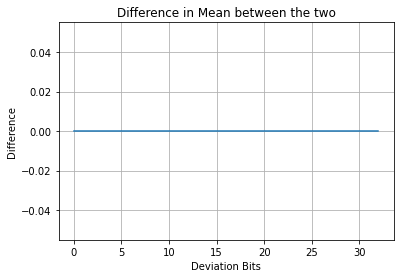

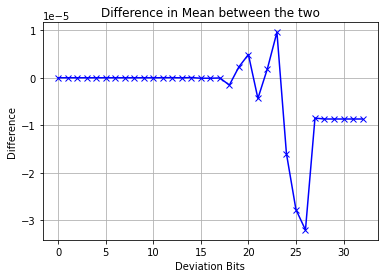

In [5]:
def mean_BC(listBases, listCounts):
    resultslist = list()
    summ = 0.0
    totalSamples = 0
    for index in range(0, len(listBases)):                                              # Lists of deviation bit X Datasets
        totalSamples = 0
        summ = 0
        for counter in range(0, len(listBases[index])):
            bin2f = bin_to_float(listBases[index][counter])                             # Convert the binary base value to float
            totalSamples += listCounts[index][counter][1].astype(int)                   # Adds the counts for diving later
            equ = np.multiply(bin2f, (listCounts[index][counter][1]).astype(float))     # Multiply float value of base with count
            summ = equ + summ                                                           # Running sum
            if counter == len(listBases[index])-1:
                resultslist.append(summ/totalSamples)                                   # Return results when done with X deviation bits

    return resultslist
means = mean_BC(lstBase,lstCounts)
means_featurelst = list()
means_diff = list()
ogmdif = list()
for i in range(0,len(featureLst)):
    means_featurelst.append(featureLst[i][3])
    means_diff.append(means[i] - featureLst[i][3]) 
    ogmdif.append(means[i]-og_info[3]) 
plt.figure(5); plt.plot(means); plt.title("Mean for each Deviation Bits - B*C"); plt.xlabel("Deviation Bits"); plt.ylabel("Mean"); plt.grid()
plt.figure(6);plt.plot(means_featurelst, 'y'); plt.title("Mean for each Deviation Bits - NumPy"); plt.xlabel("Deviation Bits"); plt.ylabel("Mean"); plt.grid()
plt.figure(7); plt.plot(means_diff); plt.title("Difference in Mean between the two"); plt.xlabel("Deviation Bits"); plt.ylabel("Difference"); plt.grid()


plt.figure(77); plt.plot(ogmdif, "-bx"); plt.title("Difference in Mean between the two"); plt.xlabel("Deviation Bits"); plt.ylabel("Difference"); plt.grid()


### Whats the difference between Compressed data and Original data

In [6]:
diffplotter = 20; diffplotterlen =1000
print(type(d_og))
print(lstData[22])
# for i in range(0,len(lstData)):
#     np.subtract(lstData[i],d_og)
#     diffList.append(np.subtract(lstData[i],d_og))
#np.subtract(lstData[i],d_og)
#diffList= np.array(np.subtract(lstData[diffplotter][0:100],d_og[0:100]))


"""
print(d_og[0:4])
print(lstData[diffplotter][0:4])
print(diffList[diffplotter][0:4])
plt.figure(7);  plt.plot(d_og[0:diffplotterlen], 'r');    plt.title("Uncompressed Data");      plt.xlabel("Sample"); plt.ylabel("Value"); plt.grid()
plt.figure(8);  plt.plot(diffList[diffplotter-2][0:diffplotterlen]);    plt.title("Deviation Bits :"+str(diffplotter-2));   plt.xlabel("Sample"); plt.ylabel("Difference"); plt.grid()
plt.figure(9);  plt.plot(diffList[diffplotter-1][0:diffplotterlen]);    plt.title("Deviation Bits :"+str(diffplotter-1));   plt.xlabel("Sample"); plt.ylabel("Difference"); plt.grid()
plt.figure(10); plt.plot(diffList[diffplotter][0:diffplotterlen], 'orange');      plt.title("Deviation Bits :"+str(diffplotter));     plt.xlabel("Sample"); plt.ylabel("Difference"); plt.grid()
plt.figure(11); plt.plot(diffList[diffplotter+1][0:diffplotterlen]);    plt.title("Deviation Bits :"+str(diffplotter+1));   plt.xlabel("Sample"); plt.ylabel("Difference"); plt.grid()
plt.figure(12); plt.plot(diffList[diffplotter+2][0:diffplotterlen]);    plt.title("Deviation Bits :"+str(diffplotter+2));   plt.xlabel("Sample"); plt.ylabel("Difference"); plt.grid()
plt.figure(13); plt.plot(diffList[diffplotter+3][0:diffplotterlen]);    plt.title("Deviation Bits :"+str(diffplotter+3));   plt.xlabel("Sample"); plt.ylabel("Difference"); plt.grid()
"""

<class 'numpy.ndarray'>
[ 0.015625    0.015625    0.0078125  ... -0.0078125  -0.00390625
  0.00097656]


'\nprint(d_og[0:4])\nprint(lstData[diffplotter][0:4])\nprint(diffList[diffplotter][0:4])\nplt.figure(7);  plt.plot(d_og[0:diffplotterlen], \'r\');    plt.title("Uncompressed Data");      plt.xlabel("Sample"); plt.ylabel("Value"); plt.grid()\nplt.figure(8);  plt.plot(diffList[diffplotter-2][0:diffplotterlen]);    plt.title("Deviation Bits :"+str(diffplotter-2));   plt.xlabel("Sample"); plt.ylabel("Difference"); plt.grid()\nplt.figure(9);  plt.plot(diffList[diffplotter-1][0:diffplotterlen]);    plt.title("Deviation Bits :"+str(diffplotter-1));   plt.xlabel("Sample"); plt.ylabel("Difference"); plt.grid()\nplt.figure(10); plt.plot(diffList[diffplotter][0:diffplotterlen], \'orange\');      plt.title("Deviation Bits :"+str(diffplotter));     plt.xlabel("Sample"); plt.ylabel("Difference"); plt.grid()\nplt.figure(11); plt.plot(diffList[diffplotter+1][0:diffplotterlen]);    plt.title("Deviation Bits :"+str(diffplotter+1));   plt.xlabel("Sample"); plt.ylabel("Difference"); plt.grid()\nplt.figure

- 4| Variance 

0.00021221165277239928
500000


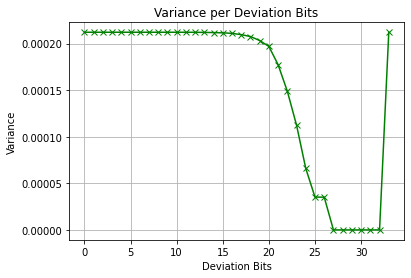

In [7]:
Variance = list()
for y in range(0,len(featureLst)):
    Variance.append(np.float64(featureLst[y][4]))
og_info = gather_Features(d_og)
Variance.append(og_info[4])
plt.figure(22); plt.plot(Variance,"-gx"); plt.title("Variance per Deviation Bits"); plt.xlabel("Deviation Bits"); plt.ylabel("Variance"); plt.grid()
#plt.figure(23); plt.plot(featureLst[:][4],'-rX'); plt.title("Amount of Bases per Deviation Bits"); plt.xlabel("Deviation Bits"); plt.grid()

print(og_info[4])
print(len(lstData[0]))

### How much is the data compressed compared to Originaldata
Metric 1

In [8]:
cTON = 20; setter = 0; totalSamples = 0
highest = 0
sizeOG = len(lstData[0]) * 32             #16 Million bits
print("Amount of deviation bits used                        : "+str(cTON))
print("The amount of bits found in the original data set    : "+str(sizeOG))
print("What the original data looks like                    : "+str(float_to_bin(d_og[setter])))
print("What the data stored looks like                      : "+str(lstBase[cTON][setter]))
print("There is >> "+str(len(lstBase[cTON][setter])-2-cTON)+" << bits of data after compression and >> "+str(cTON)+" << bits of 0/Zero")
print("Number of bases                                      : "+str(len(lstBase[cTON])))

dataBits = lstBase[cTON][setter][2:(34-cTON):]                            #Data bits
compressionBits = lstBase[cTON][setter][-1:(33-cTON):-1]


print("Databits             : "+str(dataBits))
print("compressionBits      : "+str(compressionBits))
print(dataBits+"|"+compressionBits)
print(float_to_bin(d_og[setter])[2::])
#print(len(lstBase[cTON][0])-2-cTON)         #Subtract (2) as this is the prefix for base 2 values
#print(cDevi)

for counter in range(0, len(lstBase[cTON])):
    current = lstCounts[cTON][counter][1].astype(int)
    totalSamples += lstCounts[cTON][counter][1].astype(int) 
    if current > highest:
        highest = current
#2^n   12    13    14     15     16      17      18      19
n2 = [4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]
print("Highest value of count     : "+str(highest))
for ccounter in range(0,len(n2)):
    aahead = ccounter+1
    if highest > n2[ccounter] and highest < n2[aahead]:
        compressedCounts = len(lstBase[cTON]) * ccounter+13
        print("Counts need "+str(ccounter+13)+" bits")


#                  Amount of data bits * number of bases
compressedBase      = ((len(dataBits)) * len(lstBase[cTON]))
#                  Bits needed to store counts * number of bases
compressedCounts    = compressedCounts * len(lstBase[cTON])
#                  Amount of devi bits * number of samples
compressedDevi      = cTON * len(d_og)
# IDs = bits need to store numbers = number of bases
compressedID = 0
for counter in range(0,11):
    ahead = counter+1
    if (((len(lstBase[cTON])) > np.power(2,counter)) & ((len(lstBase[cTON])) < np.power(2,ahead))):
        compressedID = counter
        print("IDs need "+str(ahead)+" bits")
compressedID = compressedID * len(d_og)


#metric 1 base + count
metric1 = compressedBase + (compressedCounts)
metric1Ratio = metric1 / sizeOG
#metric 2 base + ids
metric2 = compressedBase + compressedID
metric2Ratio = metric2 / sizeOG
#metric 3 base + id + devication
metric3 = compressedBase + compressedID + compressedDevi
metric3Ratio = metric3 / sizeOG



print("Bits needed to store Bases       : "+str(compressedBase))
print("Bits needed to store Counts      : "+str(compressedCounts))
print("Bits needed to store Deviations  : "+str(compressedDevi))
print("Bits needed to store ID's        : "+str(compressedID))

print("Metric 1 - Base + Count          : "+str(metric1Ratio*100)+"%")
print("Metric 2 - Base + ID             : "+str(metric2Ratio*100)+"%")
print("Metric 3 - Base + ID + Deviation : "+str(metric3Ratio*100)+"%")




Amount of deviation bits used                        : 20
The amount of bits found in the original data set    : 16000000
What the original data looks like                    : 0b00111100100111000011110010101100
What the data stored looks like                      : 0b00111100100100000000000000000000
There is >> 12 << bits of data after compression and >> 20 << bits of 0/Zero
Number of bases                                      : 59
Databits             : 001111001001
compressionBits      : 00000000000000000000
001111001001|00000000000000000000
00111100100111000011110010101100
Highest value of count     : 19178
Counts need 15 bits
IDs need 6 bits
Bits needed to store Bases       : 708
Bits needed to store Counts      : 7729
Bits needed to store Deviations  : 10000000
Bits needed to store ID's        : 2500000
Metric 1 - Base + Count          : 0.05273125%
Metric 2 - Base + ID             : 15.629425%
Metric 3 - Base + ID + Deviation : 78.129425%


metric 1 base+count
metric 2 base + ids
metric 3 base + id + devication

more data

OG vs comp > FFT > Compare outcome
>--Runes pipeline

Error of mean procent y aksis
compression rato x asksis

mail: Handin + eksamen date
mail: rune regarding meeting.

June 12/13- anything after

difference in FFT
-can any information be gather, significant differences
--SME, log scale
distorance



In [9]:
def compression_Ratios(DEVIATION_BITS, ORIGINAL_DATA, verbose = False):
    setter = 0; totalSamples = 0; highest = 0; IDbits = 0; Countsbits = 0
    sizeOG = len(ORIGINAL_DATA) * 32             #16 Million bits
    dataBits = lstBase[DEVIATION_BITS][setter][2:(34-DEVIATION_BITS):]                            #Data bits
    compressionBits = lstBase[DEVIATION_BITS][setter][-1:(33-DEVIATION_BITS):-1] 

    for IDcounter in range(0,28):
        IDahead = IDcounter+1
        if (((len(lstBase[DEVIATION_BITS])) > np.power(2,IDcounter)) & ((len(lstBase[DEVIATION_BITS])) < np.power(2,IDahead))):
            IDbits = IDcounter+1
            break
        
    for TScounter in range(0, len(lstBase[DEVIATION_BITS])):
        current = lstCounts[DEVIATION_BITS][TScounter][1].astype(int)
        totalSamples += lstCounts[DEVIATION_BITS][TScounter][1].astype(int) 
        if current > highest:
            highest = current

    for ccounter in range(0,28):
        cahead = ccounter+1
        if ((highest > np.power(2,ccounter)) and (highest < np.power(2,cahead))):
            Countsbits = ccounter+1
            break
            
    #                  Amount of data bits * number of bases
    compressedBase      = ((len(dataBits)) * len(lstBase[DEVIATION_BITS]))
    #                  Bits needed to store counts * number of bases
    compressedCounts    = Countsbits * len(lstBase[DEVIATION_BITS])
    #                  Amount of devi bits * number of samples
    compressedDevi      = DEVIATION_BITS * len(d_og)
    # IDs = bits need to store numbers = number of bases
    compressedID = IDbits * len(d_og)


    #metric 1 base + count
    metric1 = compressedBase + (compressedCounts)
    metric1Ratio = metric1 / sizeOG
    #metric 2 base + ids
    metric2 = compressedBase + compressedID
    metric2Ratio = metric2 / sizeOG
    #metric 3 base + id + devication
    metric3 = compressedBase + compressedID + compressedDevi
    metric3Ratio = metric3 / sizeOG

    if (verbose == True):
        print(">>Compression ratio finder<<")
        print("Size of the original data       : "+str(sizeOG)+" bits")
        print("Data bits >"+str(len(lstBase[DEVIATION_BITS][setter])-2-DEVIATION_BITS)+"< & Deviation bits >"+str(DEVIATION_BITS)+"< & Number of bases >"+str(len(lstBase[DEVIATION_BITS]))+"<")
        print("Random look at data point")
        print(dataBits+"|"+compressionBits)
        print("IDs need     "+str(IDbits)+" bits")
        print("Counts need  "+str(Countsbits)+" bits")    
        print("Highest value of count     : "+str(highest))

        print("Bits needed to store Bases       : "+str(compressedBase))
        print("Bits needed to store Counts      : "+str(compressedCounts))
        print("Bits needed to store Deviations  : "+str(compressedDevi))
        print("Bits needed to store ID's        : "+str(compressedID))

        print("Metric 1 - Base + Count          : "+str(metric1Ratio*100)+"%")
        print("Metric 2 - Base + ID             : "+str(metric2Ratio*100)+"%")
        print("Metric 3 - Base + ID + Devication: "+str(metric3Ratio*100)+"%")

        
    return metric1Ratio*100, metric2Ratio*100, metric3Ratio*100, metric1, metric2, metric3, sizeOG, DEVIATION_BITS
   

(0.0040625, 15.626562499999999, 84.37656249999999, 650, 2500250, 13500250, 16000000, 22)


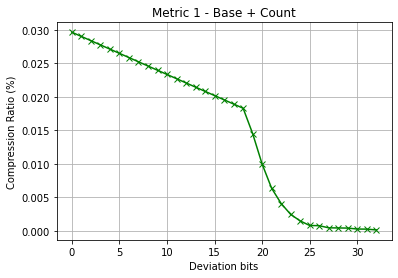

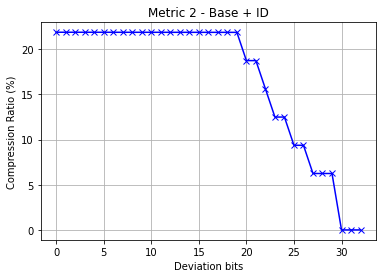

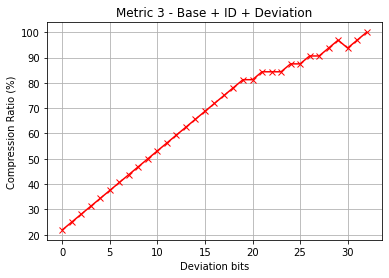

In [10]:
lstMetrics =list()
for yy in range(0,33):
    lstMetrics.append(compression_Ratios(yy, d_og, False))

lstm1 =list(); lstm2 =list(); lstm3 =list()
for graffer in range(0,len(lstMetrics)):   
    lstm1.append(lstMetrics[graffer][0])
    lstm2.append(lstMetrics[graffer][1])
    lstm3.append(lstMetrics[graffer][2])

print(lstMetrics[22])
plt.figure(888); plt.plot(lstm1,'-gx'); plt.title("Metric 1 - Base + Count");   plt.xlabel("Deviation bits"); plt.ylabel("Compression Ratio (%)"); plt.grid()
plt.figure(889); plt.plot(lstm2,'-bx'); plt.title("Metric 2 - Base + ID");   plt.xlabel("Deviation bits"); plt.ylabel("Compression Ratio (%)"); plt.grid()
plt.figure(885); plt.plot(lstm3,'-rx'); plt.title("Metric 3 - Base + ID + Deviation");   plt.xlabel("Deviation bits"); plt.ylabel("Compression Ratio (%)"); plt.grid()


[-183.9528735262274, -319.6261117067651, -368.9568539067898, -97.774743111353]


ValueError: x and y must have same first dimension, but have shapes (33,) and (32,)

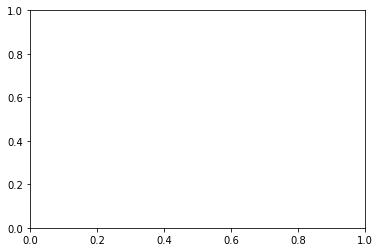

In [11]:
#print(ogmdif[18])
#print(ogmdif[18]/og_info[3]*100)
#Error of mean procent
#(CompressedMEAN - ogMEAN)/ogMEAN   *100

#Error of mean procent y aksis
#compression rato x asksis

errorMeanProcent = list()
for mdfinder in range(0,(len(ogmdif)-1)):
    errorMeanProcent.append(ogmdif[mdfinder]/og_info[3]*100)

print(errorMeanProcent[24:28])

plt.figure(823); plt.plot(lstm1,errorMeanProcent,'-gx'); plt.title("Error of mean depending on compression (Metric 1)");   plt.xlabel("Compression Ratio (%)"); plt.ylabel("Error in mean (%)"); plt.grid()
plt.figure(855); plt.plot(lstm2,errorMeanProcent,'-bx'); plt.title("Error of mean depending on compression (Metric 2)");   plt.xlabel("Compression Ratio (%)"); plt.ylabel("Error in mean (%)"); plt.grid()
plt.figure(824); plt.plot(lstm3,errorMeanProcent,'-rx'); plt.title("Error of mean depending on compression (Metric 3)");   plt.xlabel("Compression Ratio (%)"); plt.ylabel("Error in mean (%)"); plt.grid()
plt.figure(522); plt.plot(means); plt.title("Mean for each Deviation Bits - B*C"); plt.xlabel("Deviation Bits"); plt.ylabel("Mean"); plt.grid()


101
101


(9.0, 20.0)

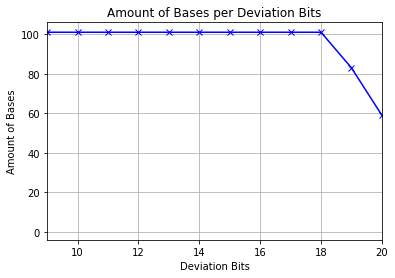

In [ ]:
OOI = 16
uniq = np.unique(lstData[OOI])
uniqOG = np.unique(d_og)
print(len(uniq))
print(len(lstBase[OOI]))

plt.figure(1); plt.plot(lenBase,"-bx"); plt.title("Amount of Bases per Deviation Bits"); 
plt.xlabel("Deviation Bits"); plt.ylabel("Amount of Bases"); plt.grid(); plt.xlim(9,20)


In [ ]:
#'sample_frequency': 50000.0
#'rpm': 2198.69
# Sample rate
comp_rate = 27
legnther = 5000
sr = 50000 #Hz
# Sample interval
ts = 1.0/sr
t = np.arange(0,len(d_og)/sr,ts)
t_comp = np.arange(0,len(lstData[2])/sr,ts)

fig, axs = plt.subplots(2,1)
f_og = d_og#[0:len(t)]     #np.sin(2*np.pi*10*t) + np.sin(2*np.pi*40*t)
f_comp = lstData[comp_rate][0:len(t)]#[0:len(t)]   #np.sin(2*np.pi*6*t) + np.sin(2*np.pi*4*t)
plt.sca(axs[0])
plt.plot(t,f_og,color='c', label="Original"); plt.xlabel('Time (s)'); plt.ylabel('Amplitude'); plt.title("Original")
plt.sca(axs[1])
plt.plot(t,f_comp, color='k', label="Compressed"); plt.ylabel('Amplitude'); plt.title("Compressed"); plt.xlabel('Time (s)')
#Just removing bits - deviatio>> higher
#does the fft content change?
#------Target
#whats orginal value? - Function for space vs change in content
# --| Analysis of
n = len(d_og)
fhat = np.fft.fft(f_comp)
F = np.abs(fhat)
PSD = fhat * np.conj(fhat) / n
print((sr/n))
frek = (1/(ts*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype="int")

fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(frek[0:legnther], np.abs(np.fft.fft(f_og))[0:legnther], label="Original")
plt.legend()
#multiple 
plt.sca(axs[1])
plt.plot(frek[0:legnther], F[0:legnther], 'r', label="Compressed")
plt.legend()
plt.tight_layout()
print(np.argmax(F)*sr/n) #max frek bin
print(lstData[22][0])
print(d_og[0])

Added LOG scale to FFTs

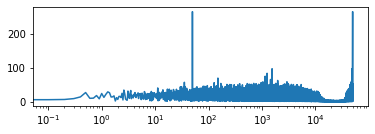

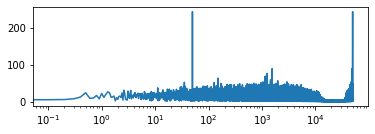

In [ ]:
def fftCompressed(data):
    fs = 50000 #Hz
    timescale = 1.0/fs
    freq = (1/(timescale*len(data))) * np.arange(len(data))
    fftData = np.abs(np.fft.fft(data))
    return freq, fftData

freqq, Baseline = fftCompressed(d_og)
fig = plt.figure(1)
ax = fig.add_subplot(2,1,1)
line, = ax.plot(freqq, Baseline)
ax.set_xscale('log')
pylab.show()
#plt.plot(freqq, Baseline, label="Baseline"); plt.title("Baseline")



scale = 21  
freqq, fftcontain = fftCompressed(lstData[scale][0:len(d_og)])
#plt.figure(2)
#plt.plot(freqq, fftcontain, label="Original"); plt.title("Compressed")

fig = plt.figure(2)
ax = fig.add_subplot(2,1,1)
line, = ax.plot(freqq, fftcontain)
ax.set_xscale('log')
pylab.show()




Find MSE on original vs compressed (all deviations)

In [ ]:
mseLst = list()
tempmselst = list()
mseLst.clear()

for indexx in range(0,len(lstData)):
    tempmselst.clear()
    for idc in range(0,len(d_og)):
        tempmselst.append(np.square(np.subtract(d_og[idc], lstData[indexx][idc])).mean())
        if idc == len(d_og)-1:
            print(indexx)
            #print(tempmselst)
            mseLst.append(tempmselst[:])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


Plotting MSE

[4.1672465973878513e-19, 5.903557443869246e-18, 1.6822423836882056e-19, 9.946009374772023e-20, 3.4988894263961457e-19]
[0.00036373736961, 0.000273207841, 0.00013094682624, 1.45494947844e-05, 4.0415390436099994e-05]
1.6822423836882056e-19


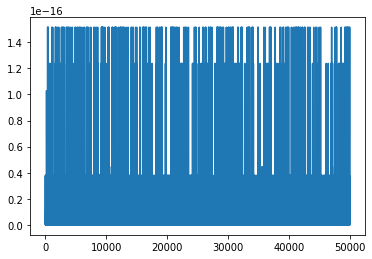

In [ ]:

print(mseLst[0][0:5])
print(mseLst[32][0:5])
print(np.square(np.subtract(d_og[2], lstData[1][2])).mean())
plt.figure(65);plt.plot(mseLst[2][0:50000])


Plotting ALL MSE

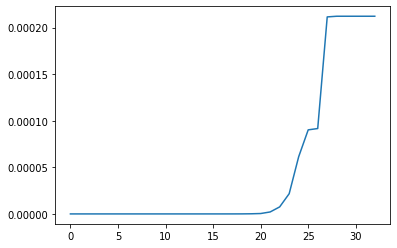

In [ ]:
avgMSE = list()
for yy in range(0,len(mseLst)):
    avgMSE.append(np.average(mseLst[yy]))

plt.figure(444);plt.plot(avgMSE)

doing MSE on FFT values instead

In [ ]:
def fftCompressed(data):
    fs = 50000 #Hz
    timescale = 1.0/fs
    freq = (1/(timescale*len(data))) * np.arange(len(data))
    fftData = np.abs(np.fft.fft(data))
    return freq, fftData

FFTMSE = list()
for indexx in range(0,len(lstData)):
    FFTMSE.append(np.square(np.subtract(np.abs(np.fft.fft(d_og)), np.abs(np.fft.fft(lstData[indexx][0:len(d_og)])))).mean())

print(FFTMSE[0])            

3.0324011462275825e-13


Resulting graph is equal to NONE FORMAT vs FFT
- Y values different scale

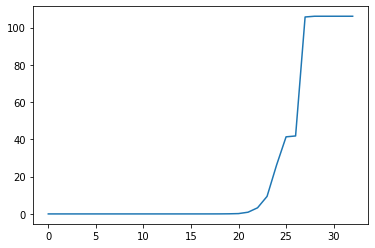

In [ ]:
plt.figure(555);plt.plot(FFTMSE)
#logscale on y axe to check lower values better

In [ ]:
tester = 0.0190719
print(tester)
print(type(tester))
bintester = float_to_bin(tester)
print(bintester)
print(type(bintester))
if bintester == "0b00111100100111000011110010101100":
    print("xD")

ftester = bin_to_float(bintester)
print(ftester)
print(lstBase[15][0])


0.0190719
<class 'float'>
0b00111100100111000011110010101100
<class 'str'>
xD
0.019071899354457855
0b00111100100111000000000000000000


(0.6103008, -5)
(0.609375, -5)
0.066116
-0.066116
0.8689305760000012


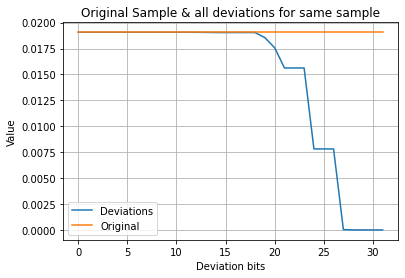

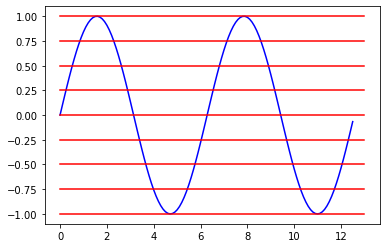

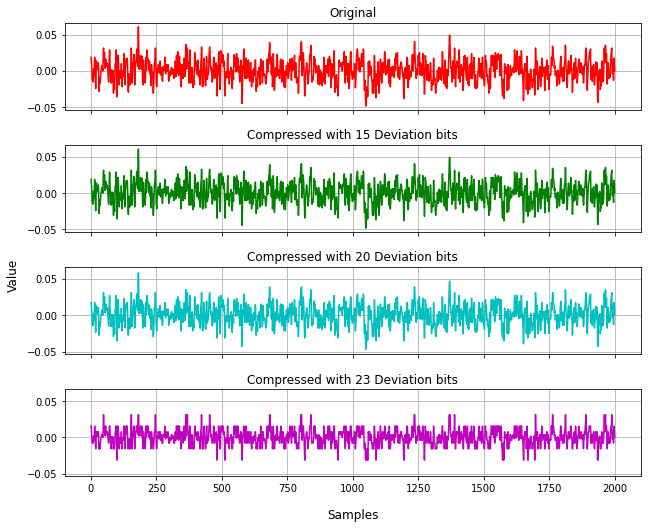

In [ ]:
"""print(d_og[0])
print("DEV15:"+str(lstData[15][0]))
print("DEV16:"+str(lstData[16][0]))
print("DEV17:"+str(lstData[17][0]))
print("DEV18:"+str(lstData[18][0]))
print("DEV19:"+str(lstData[19][0]))
print("DEV20:"+str(lstData[20][0]))
print("DEV21:"+str(lstData[24][0]))
print("DEV22:"+str(lstData[25][0]))
print("DEV23:"+str(lstData[26][0]))
"""



# calculating mantissa and
# exponent of given integer
print(math.frexp(d_og[0]))
print(math.frexp(lstData[17][0]))

print(np.max(d_og))
print(np.min(d_og))
print(np.mean(d_og)*100000)
ogplotlist = list()
plottingLst = list()
plt.figure(222)
for counter in range(0,32):
    plottingLst.append(lstData[counter][0])
    ogplotlist.append(d_og[0])

plt.plot(plottingLst, label="Deviations");plt.plot(ogplotlist,label="Original");plt.title("Original Sample & all deviations for same sample"); plt.ylabel("Value"); plt.xlabel("Deviation bits")
plt.legend(loc="lower left"); plt.grid()
plt.figure(222222)

x = np.arange(0,4*np.pi,0.1)   # start,stop,step
linje25 = list()
linje50 = list()
linje75 = list()
linje100 = list()
linjeN25 = list()
linjeN50 = list()
linjeN75 = list()
linjeN100 = list()
linje0 = list()
for cccunt in range(0,14):
    linje0.append(0)
    linje25.append(0.25)
    linje50.append(0.5)
    linje75.append(0.75)
    linje100.append(1)
    linjeN25.append(-0.25)
    linjeN50.append(-0.5)
    linjeN75.append(-0.75)
    linjeN100.append(-1)

    
y = np.sin(x)
plt.plot(x,y,'b');plt.plot(linje0, 'r');plt.plot(linje25,'r');plt.plot(linje50,'r');plt.plot(linje75,'r');plt.plot(linje100,'r');plt.plot(linjeN25,'r');plt.plot(linjeN50,'r');plt.plot(linjeN75,'r');plt.plot(linjeN100,'r')
plt.show()
timeSeriesLength = 2000
devi = 15
fig, axs = plt.subplots(4, figsize=(10,7),sharey=True)
#fig.suptitle('Data before and after compression')
axs[0].plot(d_og[0:timeSeriesLength], 'r')
axs[0].set_title("Original")
axs[0].grid()
axs[1].plot(lstData[15][0:timeSeriesLength], 'g')
axs[1].set_title("Compressed with 15 Deviation bits")
axs[1].grid()
axs[2].plot(lstData[20][0:timeSeriesLength],'c')
axs[2].set_title("Compressed with 20 Deviation bits")
axs[2].grid()
axs[3].plot(lstData[23][0:timeSeriesLength],'m')
axs[3].set_title("Compressed with 23 Deviation bits")
axs[3].grid()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=1, 
                    hspace=0.4)
fig.supylabel('Value')    
fig.supxlabel("Samples")               
for ax in axs.flat:
    ax.label_outer()
#plt.figure(4); plt.plot(d_og[0:timeSeriesLength], 'r'); plt.title('Original Timeseries'); plt.xlabel("Sample"); plt.ylabel("Value"); plt.grid()
#plt.plot(lstData[devi][0:timeSeriesLength]); plt.title('Compressed Timeseries - Deviation bits: '+str(devi)); plt.xlabel("Sample"); plt.ylabel("Value"); plt.grid()


C:\Users\Jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\lines.py:190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return Path(verts[markevery], _slice_or_none(codes, markevery))


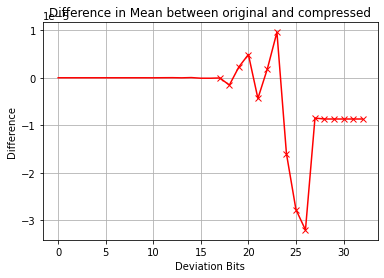

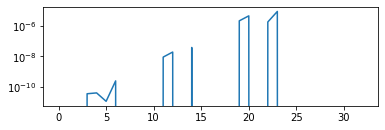

In [ ]:
plt.figure(77); plt.plot(ogmdif, "-rx", markevery=[points]); plt.title("Difference in Mean between original and compressed"); plt.xlabel("Deviation Bits"); plt.ylabel("Difference"); plt.grid()
fig = plt.figure(2)
ax = fig.add_subplot(2,1,1)
line, = ax.plot(ogmdif)
ax.set_yscale('log')

pylab.show()

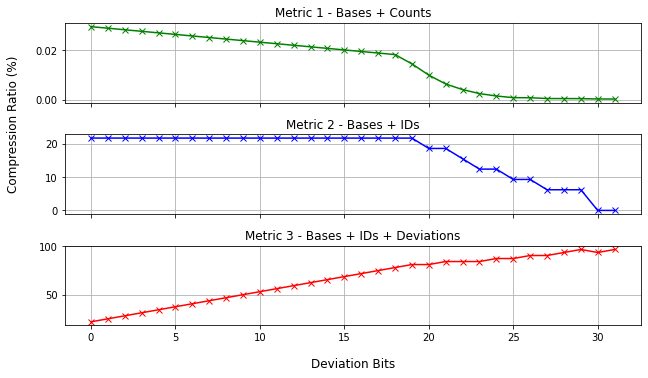

In [ ]:

#plt.figure(888); plt.plot(lstm1,'-gx'); plt.title("Metric 1 - Base + Count");   plt.xlabel("Deviation bits"); plt.ylabel("Compression Ratio (%)"); plt.grid()
#plt.figure(889); plt.plot(lstm2,'-bx'); plt.title("Metric 2 - Base + ID");   plt.xlabel("Deviation bits"); plt.ylabel("Compression Ratio (%)"); plt.grid()
#plt.figure(885); plt.plot(lstm3,'-rx'); plt.title("Metric 3 - Base + ID + Deviation");   plt.xlabel("Deviation bits"); plt.ylabel("Compression Ratio (%)"); plt.grid()
fig, axs = plt.subplots(3, figsize=(10,7))
#fig.suptitle('Data before and after compression')
axs[0].plot(lstm1,'-gx')
axs[0].set_title("Metric 1 - Bases + Counts")
axs[0].grid()
axs[1].plot(lstm2,'-bx')
axs[1].set_title("Metric 2 - Bases + IDs")
axs[1].grid()
axs[2].plot(lstm3,'-rx')
axs[2].set_title("Metric 3 - Bases + IDs + Deviations")
axs[2].grid()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.7, 
                    wspace=1, 
                    hspace=0.4)
fig.supylabel('Compression Ratio (%)')    
fig.supxlabel("Deviation Bits")               
for ax in axs.flat:
    ax.label_outer()

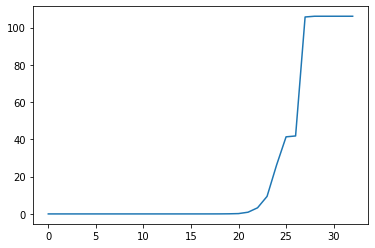

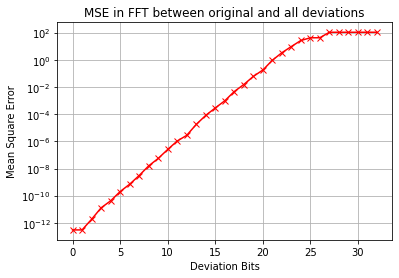

0.9132814213140933


In [ ]:
plt.figure(555);plt.plot(FFTMSE)
fig = plt.figure(2)
ax = fig.add_subplot(1,1,1)
line, = ax.plot(FFTMSE,'-xr')
ax.set_yscale('log')
ax.grid()
ax.set_xlabel("Deviation Bits")
ax.set_ylabel("Mean Square Error")
ax.set_title("MSE in FFT between original and all deviations")
#MAKE BIGGER PLOTS
pylab.show()

15


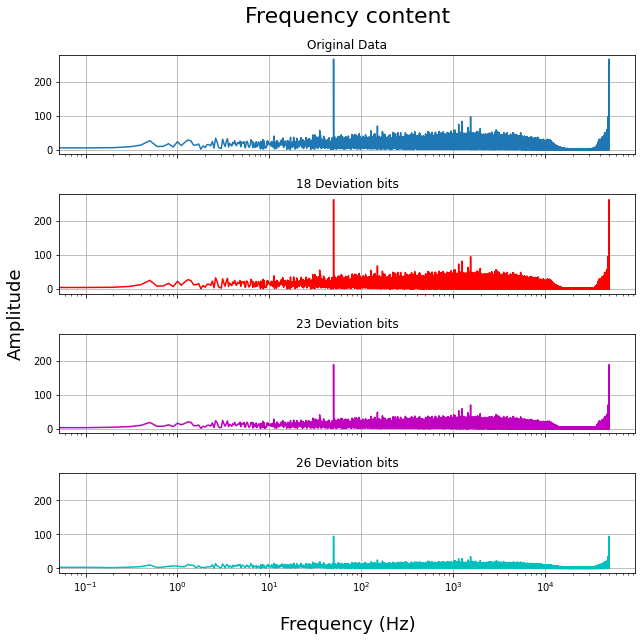

In [ ]:
scale = 18
freqq, fftcontain = fftCompressed(lstData[scale][0:len(d_og)])
freqqqq, fftcontainx = fftCompressed(lstData[scale+5][0:len(d_og)])
freqqqqq, fftcontainxx = fftCompressed(lstData[scale+8][0:len(d_og)])
baseFreq, Baseline = fftCompressed(d_og)
fig, axs = plt.subplots(4, figsize=(10,12),sharey=True)
#fig.suptitle('Data before and after compression')
axs[0].plot(baseFreq, Baseline)
axs[0].set_title("Original Data")
axs[0].grid()
axs[0].set_xscale('log')
axs[1].plot(freqq, fftcontain, 'r')
axs[1].set_title(str(scale)+" Deviation bits")
axs[1].grid()
axs[1].set_xscale('log')
axs[2].plot(freqqqq, fftcontainx, 'm')
axs[2].set_title(str(scale+5)+" Deviation bits")
axs[2].grid()
axs[2].set_xscale('log')
axs[3].plot(freqqqqq, fftcontainxx, 'c')
axs[3].set_title(str(scale+8)+" Deviation bits")
axs[3].grid()
axs[3].set_xscale('log')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.7, 
                    wspace=1, 
                    hspace=0.4)  
fig.text(0.04, 0.4, 'Amplitude', ha='center', va='center', rotation='vertical', fontsize=18) 
fig.text(0.5, 0.04, 'Frequency (Hz)', ha='center', va='center', fontsize=18)
fig.suptitle("Frequency content", x=0.5, y=0.755, fontsize=22)       
for ax in axs.flat:
    ax.label_outer()

print(len(lstBase[scale+5]))